In [1]:
# import libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
amino = pd.read_csv("AA & sugars Polemonium.csv")

In [3]:
amino.head()

,pop,LOC,ln_pop_size_2018,freq_of_visit,seed_prod,phase,fru ug/ul,glu ug/ul,sac ug/ul,AAs sum [pmol/uL],...,NVA %,TRP %,PHE %,ILE %,ORN %,LEU %,LYS %,HYP %,SAR %,PRO %
0,BIA,NE,4.61,13.4,12.3,M,70.098400,19.66292,63.411520,1751.187429,...,0.79,0.5,5.71,2.00,2.91,1.33,3.74,NaN,1.29,4.60
1,BIA,NE,4.61,13.4,12.3,F,138.228000,68.32804,1.913312,195.012100,...,NaN,NaN,3.92,2.01,3.63,3.40,10.67,NaN,NaN,NaN
2,BOB,N,3.69,1.0,12.6,M,33.781800,9.70473,6.147660,469.099865,...,NaN,NaN,2.91,2.29,2.73,1.06,NaN,NaN,5.00,14.34
3,BOB,N,3.69,1.0,12.6,F,124.218000,49.34385,10.057260,148.956264,...,NaN,NaN,3.50,2.45,NaN,3.40,1.45,NaN,NaN,NaN
4,CZL,S,6.21,5.4,12.0,M,40.299948,20.44272,88.108992,144.522395,...,NaN,NaN,9.37,2.69,NaN,8.26,NaN,NaN,NaN,2.40


In [4]:
amino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 40 columns):
pop                  28 non-null object
LOC                  28 non-null object
ln_pop_size_2018     28 non-null float64
freq_of_visit        28 non-null float64
seed_prod            28 non-null float64
phase                28 non-null object
fru ug/ul            28 non-null float64
glu ug/ul            28 non-null float64
sac ug/ul            28 non-null float64
AAs sum [pmol/uL]    28 non-null float64
ASP %                28 non-null float64
GLU %                28 non-null float64
ASN %                26 non-null float64
SER %                28 non-null float64
GLN %                28 non-null float64
HIS %                17 non-null float64
GLY %                24 non-null float64
THR %                28 non-null float64
CIT %                25 non-null float64
ARG %                28 non-null float64
BALA %               28 non-null float64
ALA %                19 non-null float6

In [5]:
amino.fillna(0, inplace=True)

In [12]:
col = {'NE':'#228B22', 'N':'#46c4fd', 'S':"#e5247e"}#, 'HUM':''}
amino["colors"] = amino.LOC.apply(lambda x: col[x])

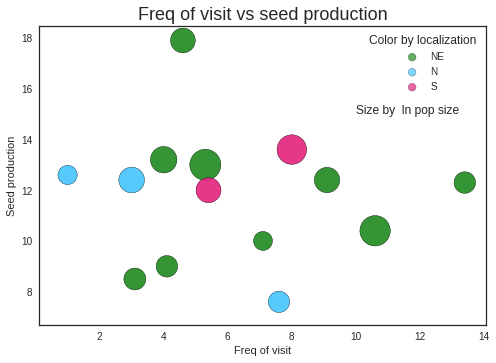

In [18]:
labels =[]
sns.set_style("white")
for key, value in col.items():
    labels.append(key)
    plt.scatter(x = amino.freq_of_visit[amino.LOC == key], y = amino.seed_prod[amino.LOC == key],
            s = np.array(amino.ln_pop_size_2018[amino.LOC == key])*100, 
            c = amino.colors[amino.LOC == key], alpha=0.7, edgecolors='black')

#plt.yscale('log')
#plt.xscale('log') 
plt.xlabel('Freq of visit')
plt.ylabel('Seed production')
plt.title('Freq of visit vs seed production', fontsize=18)
#plt.xlim(0,350)

#plt.xticks([1000,10000,100000], ['1k','10k','100k'])
#plt.text(120, 24, 'F.imperialis')
#plt.text(70, 4, 'F.eduardi')
lgnd = plt.legend(labels, title='Color by localization')
for i in range(len(col)):
    lgnd.legendHandles[i]._sizes = [60]

plt.text(10,15, "Size by  ln pop size")
#plt.scatter(110, 51, s=100, c = 'white', edgecolors='k')
#plt.text(140, 49.8,  r'$0.1 \mu g$')
# Show the plot
plt.show()